In [16]:
%matplotlib inline
from __future__ import print_function

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
 
import importlib
import pickle
from utils.Version_1.data_utils import *
from utils.Version_1.preprocessing import *
from utils.Version_1.helper import *
root = '/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
base_model = os.path.join(root,'model_2')
config= parse_conf_file(os.path.join(base_model,'conf_model.json'))
config['seq_length'] = 25

In [23]:
config['seq_length'] = 200
config['hiddens'] = 200
config['lr'] = 0.01
config['nb_layers'] =2

In [24]:
from utils.Version_1.train_utils import *
model = Model(config, mode='train', hp=['lr', 'reg', 'hiddens'], on_platform='thorey')

{'hiddens': 200, 'lr': 0.01, 'reg': 1e-06}
Loading the prepro pipeline : [u'MissingValueInputer', u'FillRemainingNaN', u'MyStandardScaler']
Loading data iterator using : benchmark
Le train is composed by 3 group and 4425 observation
Le val is composed by 3 group and 2213 observation
Le test is composed by 3 group and 739 observation
Build the architecture: lstm, lstm
Set up the checkpoints
Initialize the loss function: partial_squared_error
Initialize the network 


In [ ]:
model.nb_epochs = 10
model.train()

# Neural Network with 490201 learnable parameters

## Layer information

  #  name    size
---  ------  --------
  0  in      Nonex9
     lstm_0  Nonex200
     lstm_1  Nonex200
             200
     dense   1
             None



In [9]:
for Xb,yb in model.batch_ite_train:
    print(np.mean(model.get_loss(Xb,yb)),len(yb[yb>1]))

41.6910733505 566
16.4105893796 312
0.906545327109 22
0.00295607489534 0
0.00703881012566 0
15.6718881618 115
15.4278960034 359
3.70934972511 51
0.0282232177914 0
0.494430683644 0
0.878374940157 0
0.0312910544735 0
0.870199597081 88
3.75152321444 37
0.140583570554 0
0.410575695612 0
0.105608639842 0
0.0933817685315 0
1.46569495416 0
0.126009937482 0
0.117420703459 24
7.41326937483 70
16.711746579 130
0.0555864957095 1
12.6956191399 45
2.38518606065 30
2.7795818057e-05 0
1.20256058574 107
60.9695125941 276
85.0442975979 382
11.4162257267 230
13.3737138285 221
1.11673554873 34
0.00578861278716 0
1.20370621524e-35 0
0.000927984921578 0
0.150091712844 11
7.67555661575 113
0.0431358203226 1
0.290307022536 32
0.172365045663 18
7.36002269343e-06 0
2.93601295942e-05 0
0.00106667475222 0
1.83744283378 0
2.96844789391 113
2.59188304385 162
0.0452342655421 0
4.80752833513 105
19.5249481767 280
9.83135677121 205
0.192847924221 10
1.20370621524e-35 0
1.20370621524e-35 0
1.20370621524e-35 0
2.468908

In [26]:
        train = model.predict_yield('train')
        val = model.predict_yield('val')
        test = model.predict_yield('test')
        final_pred = train.append(val.append(test))
        final_pred = final_pred[final_pred['type'] == 'prediction']

In [27]:
model.make_submission(final_pred)

Will write output to ~/Documents/project/competition/fognet/models/bbking/lstm/model_2/hiddens_60_lr_0.0001_reg_1e-06/submissions_20160330_160503.csv


In [20]:
df1 = pd.read_csv(os.path.join(base_model,'hiddens_60_lr_0.0001_reg_1e-06/submissions_20160330_162136.csv'),index_col=0)

In [21]:
data = load_raw_data()

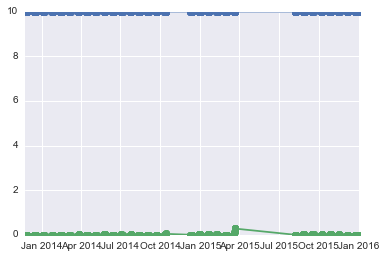

In [22]:
df = data['submission_format']
df['yield'] = 10
plt.plot(df,marker ='o')
plt.plot(df1,marker ='o')

In [47]:
df1['yield']

2013-11-24 00:00:00    1.145978e-20
2013-11-24 02:00:00    0.000000e+00
2013-11-24 04:00:00    1.145978e-20
2013-11-24 06:00:00    2.291955e-20
2013-11-24 08:00:00    3.437933e-20
2013-11-24 10:00:00    2.291955e-20
2013-11-24 12:00:00    3.437933e-20
2013-11-24 14:00:00    4.583910e-20
2013-11-24 16:00:00    3.437933e-20
2013-11-24 18:00:00    4.583910e-20
2013-11-24 20:00:00    5.729888e-20
2013-11-24 22:00:00    4.583910e-20
2013-11-25 00:00:00    5.729888e-20
2013-11-25 02:00:00    6.875865e-20
2013-11-25 04:00:00    5.729888e-20
2013-11-25 06:00:00    6.875865e-20
2013-11-25 08:00:00    8.021843e-20
2013-11-25 10:00:00    6.875865e-20
2013-11-25 12:00:00    8.021843e-20
2013-11-25 14:00:00    9.167820e-20
2013-11-25 16:00:00    8.021843e-20
2013-11-25 18:00:00    8.021843e-20
2013-11-25 20:00:00    8.021843e-20
2013-11-25 22:00:00    8.021843e-20
2013-11-26 00:00:00    8.021843e-20
2013-11-26 02:00:00    8.021843e-20
2013-11-26 04:00:00    8.021843e-20
2013-11-26 06:00:00    8.021

In [20]:
train = model.predict_yield('train')
val = model.predict_yield('val')
test = model.predict_yield('test')

In [21]:
df = train.append(val.append(test))

In [25]:
df[df['type']=='prediction']

,percip_mm,humidity,temp,leafwet450_min,leafwet460_min,leafwet_lwscnt,gusts_ms,wind_dir,wind_ms,type,yield,group,yield_pred
2013-11-24 00:00:00,-0.094507,-0.624410,-0.833732,-0.649732,-0.774763,-0.494924,-0.139276,-0.247646,-0.026560,prediction,-1,group0,1.145978e-20
2013-11-24 02:00:00,-0.094507,-0.624410,-0.833732,-0.649732,-0.774763,-0.494924,-0.139276,-0.247646,-0.026560,prediction,-1,group0,0.000000e+00
2013-11-24 04:00:00,-0.094507,-0.624410,-0.833732,-0.649732,-0.774763,-0.494924,-0.139276,-0.247646,-0.026560,prediction,-1,group0,1.145978e-20
2013-11-24 06:00:00,-0.094507,-0.624410,-0.833732,-0.649732,-0.774763,-0.494924,-0.139276,-0.247646,-0.026560,prediction,-1,group0,2.291955e-20
2013-11-24 08:00:00,-0.094507,-0.624410,-0.833732,-0.649732,-0.774763,-0.494924,-0.139276,-0.247646,-0.026560,prediction,-1,group0,3.437933e-20
2013-11-24 10:00:00,-0.094507,-0.624410,-0.833732,-0.649732,-0.774763,-0.494924,-0.139276,-0.247646,-0.026560,prediction,-1,group0,2.291955e-20
2013-11-24 12:00:00,-0.094507,-0.624410,-0.833732,-0.649732,-0.774763,-0.494924,-0.139276,-0.247646,-0.026560,prediction,-1,group0,3.437933e-20
2013-11-24 14:00:00,-0.094507,-0.624410,-0.833732,-0.649732,-0.774763,-0.494924,-0.139276,-0.247646,-0.026560,prediction,-1,group0,4.583910e-20
2013-11-24 16:00:00,-0.094507,-0.624410,-0.833732,-0.649732,-0.774763,-0.494924,-0.139276,-0.247646,-0.026560,prediction,-1,group0,3.437933e-20
2013-11-24 18:00:00,-0.094507,-0.624410,-0.833732,-0.649732,-0.774763,-0.494924,-0.139276,-0.247646,-0.026560,prediction,-1,group0,4.583910e-20


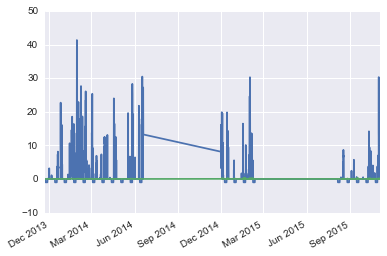

In [15]:
df['yield'].plot()
df.yield_pred.plot()

In [637]:
df[df['yield']>0]['yield'].mean()

5.80877485682263

In [627]:
model.get_score_set(split='train')

4.1522610993152629

In [628]:
model.get_score_set(split='val')

2.2619700529259119

In [629]:
model.get_score_set(split='test')

1.7573833398620629

In [611]:
df = build_dataset('micro')

In [566]:
train, val, test = train_val_test_split(df)

Le train is composed by 3 group and 5162 observation
Le val is composed by 3 group and 1476 observation
Le test is composed by 3 group and 739 observation


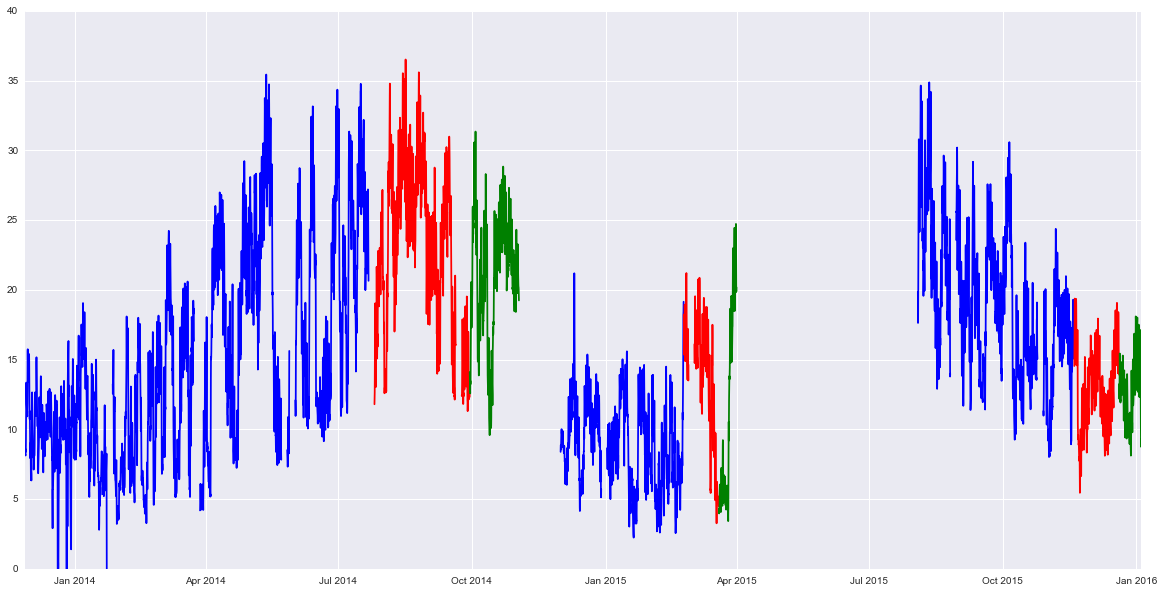

In [567]:
fig = plt.figure(figsize=(20,10))
for name,gp in train.groupby('group'):
    plt.plot(gp.temp,color = 'b')
for name,gp in val.groupby('group'):
    plt.plot(gp.temp,color = 'red')
for name,gp in test.groupby('group'):
    plt.plot(gp.temp,color = 'green')

In [532]:
feats = [f for f in train.columns if f not in ['group','yield','type']]

In [569]:
pipe_list = ['MissingValueInputer','FillRemainingNaN','MyStandardScaler']
pipe_kwargs = {'MissingValueInputer__method': 'time','FillRemainingNaN__method':'bfill'}
pipeline = build_pipeline(pipe_list,pipe_kwargs)

In [571]:
nfeats,batch_ite_train, batch_ite_val, batch_ite_test = load_data('micro',feats,pipeline=pipeline,batch_size=25,seq_length=200,stride=1)

Le train is composed by 3 group and 5162 observation
Le val is composed by 3 group and 1476 observation
Le test is composed by 3 group and 739 observation


In [576]:
from utils.Version_1 import net_builder
builder = getattr(net_builder, 'lstm')
architecture = builder(n=1,
                       D=nfeats,
                       H=50,
                       grad_clip=1)

In [592]:
from utils.Version_1 import objectives_utils

In [595]:
getattr(objectives_utils,'partial_squared_error')()

TypeError: partial_squared_error() takes exactly 2 arguments (0 given)

In [577]:
def loss_function(network_output, target):
    cost= (network_output[(target>-1).nonzero()] - target[(target>-1).nonzero()])**2
    return cost

In [581]:
from utils.Version_1.nolearn_net import NeuralNet
net = NeuralNet(layers=architecture,
                regression=True,
                objective_loss_function=loss_function,
                objective_l2=1e-6,  # L2 regularization
                update=getattr(lasagne.updates, 'rmsprop'),
                update_learning_rate=1e-3,
                batch_iterator_train=batch_ite_train,
                batch_iterator_test=batch_ite_val,
                on_epoch_finished=[],
                verbose=True,
                max_epochs=10000)
net.initialize()

In [585]:
for Xb,yb in batch_ite_train:
    sys.exit()

NameError: name 'sys' is not defined

In [589]:
lasagne.objectives.aggregate(loss_function(net.predict(Xb), yb))

17.800646393441621

In [590]:
from lasagne.objectives import squared_error

In [591]:
squared_error?

In [582]:
net.fit(epochs=1)

# Neural Network with 12201 learnable parameters

## Layer information

  #  name    size
---  ------  -------
  0  in      Nonex9
     lstm_0  Nonex50
             50
     dense   1
             None

  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  ------
      1       9.67656       2.48312      3.89693  29.94s


NeuralNet(X_tensor_type=None,
     batch_iterator_test=<utils.Version_1.iterator.BaseBatchIterator object at 0x13d58ce50>,
     batch_iterator_train=<utils.Version_1.iterator.BaseBatchIterator object at 0x13d9a4ed0>,
     custom_scores=None,
     layers=[<lasagne.layers.shape.ReshapeLayer object at 0x142c47150>],
     loss=None, max_epochs=10000, more_params={},
     objective=<function objective at 0x12f9618c0>, objective_l2=1e-06,
     objective_loss_function=<function loss_function at 0x13d521e60>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x143ab6b48>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x143ab6050>],
     regression=True,
     train_split=<nolearn.lasagne.base.TrainSplit object at 0x13d87f7d0>,
     update=<function rmsprop at 0x11d8fb500>, update_learning_rate=0.001,
     use_label_encoder=False, verbose=True,
     y_tensor_type=TensorType(float64, ma

In [559]:
non_feats = [f for f in train.columns if f not in feats]
train_tmp = pipeline.df_transform(train[feats]).join(train[non_feats])

In [556]:
pipeline.df_transform(train[feats])

,gusts_ms,humidity,leafwet450_min,leafwet460_min,leafwet_lwscnt,percip_mm,temp,wind_dir,wind_ms
2013-11-23 16:00:00,-0.114365,-0.594675,-0.619988,-0.480482,-0.474321,-0.087582,-0.883337,-0.197251,0.000500
2013-11-23 18:00:00,-0.114365,-0.594675,-0.619988,-0.480482,-0.474321,-0.087582,-0.883337,-0.197251,0.000500
2013-11-23 20:00:00,-0.114365,-0.594675,-0.619988,-0.480482,-0.474321,-0.087582,-0.883337,-0.197251,0.000500
2013-11-23 22:00:00,-0.114365,-0.594675,-0.619988,-0.480482,-0.474321,-0.087582,-0.883337,-0.197251,0.000500
2013-11-24 00:00:00,-0.114365,-0.594675,-0.619988,-0.480482,-0.474321,-0.087582,-0.883337,-0.197251,0.000500
2013-11-24 02:00:00,-0.114365,-0.594675,-0.619988,-0.480482,-0.474321,-0.087582,-0.883337,-0.197251,0.000500
2013-11-24 04:00:00,-0.114365,-0.594675,-0.619988,-0.480482,-0.474321,-0.087582,-0.883337,-0.197251,0.000500
2013-11-24 06:00:00,-0.114365,-0.594675,-0.619988,-0.480482,-0.474321,-0.087582,-0.883337,-0.197251,0.000500
2013-11-24 08:00:00,-0.114365,-0.594675,-0.619988,-0.480482,-0.474321,-0.087582,-0.883337,-0.197251,0.000500
2013-11-24 10:00:00,-0.114365,-0.594675,-0.619988,-0.480482,-0.474321,-0.087582,-0.883337,-0.197251,0.000500


In [521]:
a = MyImputer()
a.get_params?

In [ ]:
setattr

In [523]:
a.set_params?

In [517]:
a.__dict__

{'axis': 0,
 'copy': True,
 'missing_values': 'NaN',
 'strategy': 'mean',
 'verbose': 0}

In [482]:
pipeline.fit(train[feats])

MyPipeline(steps=[('MyImputer', MyImputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0))])

In [490]:
class MissingValueInputer(TransformerMixin):
    
    def transform(self, X, **transform_params):
        return X.interpolate(method='spline',order=3)

    def fit(self, X, y=None, **fit_params):
        return self

In [507]:
from utils.Version_1.preprocessing import *

In [510]:
a = MissingValueInputer(method='time')
a.transform(train)

,gusts_ms,humidity,leafwet450_min,leafwet460_min,leafwet_lwscnt,percip_mm,temp,type,wind_dir,wind_ms,yield,group
2013-11-23 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training,NaN,NaN,0,group0
2013-11-23 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training,NaN,NaN,0,group0
2013-11-23 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training,NaN,NaN,0,group0
2013-11-23 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training,NaN,NaN,0,group0
2013-11-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prediction,NaN,NaN,-1,group0
2013-11-24 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prediction,NaN,NaN,-1,group0
2013-11-24 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prediction,NaN,NaN,-1,group0
2013-11-24 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prediction,NaN,NaN,-1,group0
2013-11-24 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prediction,NaN,NaN,-1,group0
2013-11-24 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prediction,NaN,NaN,-1,group0


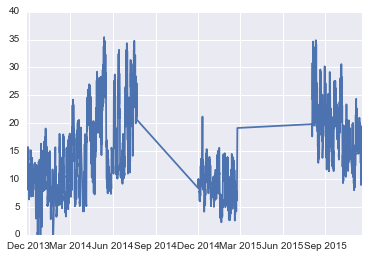

In [506]:
a = MissingValueInputer()
plt.plot(train.temp.interpolate(method='time',order=3))
#plt.plot(train.temp.fillna(method='bfill'))
#plt.plot(train.temp.interpolate(method='spline',order=3).fillna(method='bfill'))

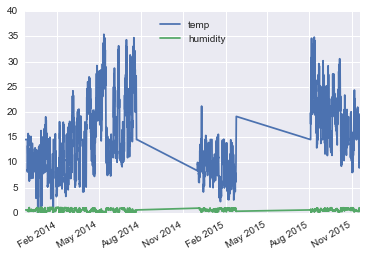

In [484]:

pipeline.df_transform(train[feats]).plot()

In [486]:
Imputer?

In [485]:
train_transform = pipeline.df_transform(train[feats])
fig = plt.figure(figsize=(20,10))
for name,gp in train_transform.groupby('group'):
    plt.plot(gp.temp)

KeyError: 'group'